# S&P 500 月足

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'GSPC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='10y', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-04-01 00:00:00-04:00,2067.629883,2125.919922,2048.379883,2085.510010,72060940000,0.0,0.0
2015-05-01 00:00:00-04:00,2087.379883,2134.719971,2067.929932,2107.389893,65187730000,0.0,0.0
2015-06-01 00:00:00-04:00,2108.639893,2129.870117,2056.320068,2063.110107,73213980000,0.0,0.0
2015-07-01 00:00:00-04:00,2067.000000,2132.820068,2044.020020,2103.840088,77920590000,0.0,0.0
2015-08-01 00:00:00-04:00,2104.489990,2112.659912,1867.010010,1972.180054,84626790000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01 00:00:00-04:00,5723.220215,6044.169922,5696.509766,6032.379883,84101980000,0.0,0.0
2024-12-01 00:00:00-05:00,6040.109863,6099.970215,5832.299805,5881.629883,86064900000,0.0,0.0
2025-01-01 00:00:00-05:00,5903.259766,6128.180176,5773.310059,6040.529785,88639380000,0.0,0.0


In [2]:
df0 = ticker.history(period='max', interval='1mo')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-01 00:00:00-05:00,167.199997,180.270004,163.360001,179.630005,2673710000,0.0,0.0
1985-02-01 00:00:00-05:00,179.630005,183.949997,177.750000,181.179993,2194620000,0.0,0.0
1985-03-01 00:00:00-05:00,181.179993,183.889999,176.529999,180.660004,2153090000,0.0,0.0
1985-04-01 00:00:00-05:00,180.660004,183.610001,177.860001,179.830002,1981880000,0.0,0.0
1985-05-01 00:00:00-04:00,179.830002,189.979996,178.350006,189.550003,2350340000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01 00:00:00-04:00,5723.220215,6044.169922,5696.509766,6032.379883,84101980000,0.0,0.0
2024-12-01 00:00:00-05:00,6040.109863,6099.970215,5832.299805,5881.629883,86064900000,0.0,0.0
2025-01-01 00:00:00-05:00,5903.259766,6128.180176,5773.310059,6040.529785,88639380000,0.0,0.0


In [16]:
period = 12
r_last = len(df0)
r1 = 0
df0['Median'] = np.nan
df0['Q1'] = np.nan
df0['Q3'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    med = np.median(df1['Close'])
    q3, q1 = np.percentile(df1['Close'], [75, 25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)  # 下限を設定
    upper_bound = q3 + (1.5 * iqr)  # 上限を設定
    name_index = df0.index[r2]
    df0.at[name_index, 'Median'] = med
    df0.at[name_index, 'Q1'] = q1
    df0.at[name_index, 'Q3'] = q3
    df0.at[name_index, 'Lower'] = lower_bound
    df0.at[name_index, 'Upper'] = upper_bound
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
1985-01-01 00:00:00-05:00,167.199997,180.270004,163.360001,179.630005,2673710000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-02-01 00:00:00-05:00,179.630005,183.949997,177.750000,181.179993,2194620000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-03-01 00:00:00-05:00,181.179993,183.889999,176.529999,180.660004,2153090000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-04-01 00:00:00-05:00,180.660004,183.610001,177.860001,179.830002,1981880000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1985-05-01 00:00:00-04:00,179.830002,189.979996,178.350006,189.550003,2350340000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 00:00:00-04:00,5723.220215,6044.169922,5696.509766,6032.379883,84101980000,0.0,0.0,5265.929932,4988.179932,5553.824829,4139.712585,6402.292175
2024-12-01 00:00:00-05:00,6040.109863,6099.970215,5832.299805,5881.629883,86064900000,0.0,0.0,5368.994873,5081.125000,5662.662476,4208.818787,6534.968689
2025-01-01 00:00:00-05:00,5903.259766,6128.180176,5773.310059,6040.529785,88639380000,0.0,0.0,5491.389893,5214.830078,5719.707642,4457.513733,6477.023987


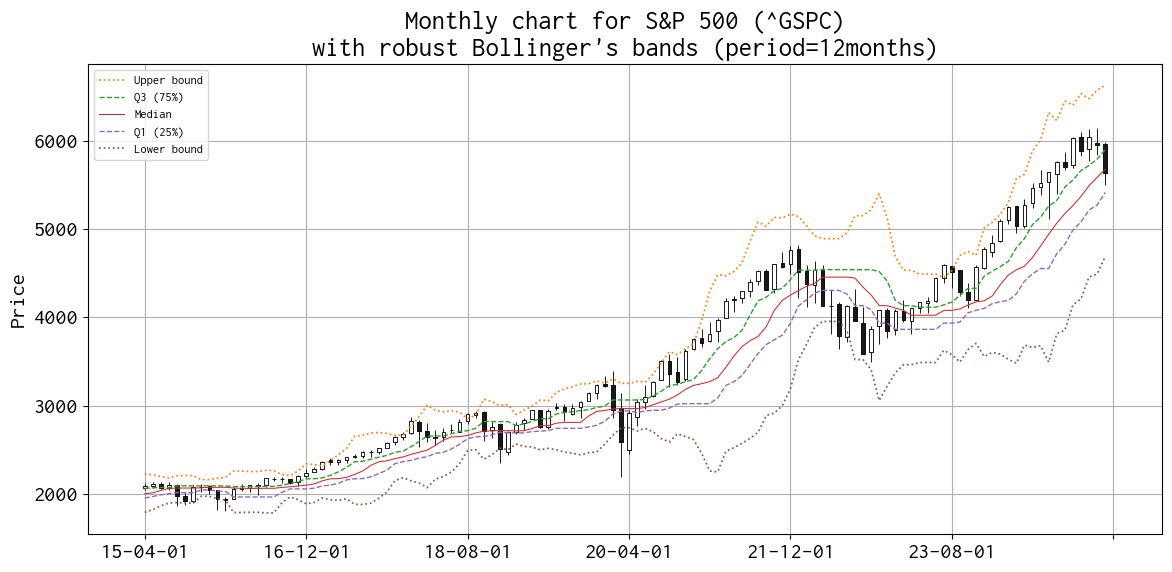

In [17]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    volume=False,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Monthly chart for %s (%s)\nwith robust Bollinger\'s bands (period=12months)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Monthly chart for %s\nwith robust Bollinger\'s bands (period=12months)' % symbol)

ax.grid()
ax.legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('monthly_chart_bollinger_robust_%s.png' % code)
plt.show()

In [8]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-01 00:00:00-05:00,5969.649902,6147.430176,5837.660156,5954.500000,92317000000,0.0,0.0
2025-03-01 00:00:00-05:00,5968.330078,5986.089844,5504.649902,5638.939941,53789539000,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00-05:00    5770.200195
2025-03-10 00:00:00-04:00    5638.939941
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00-05:00           NaN
2025-03-10 00:00:00-04:00   -131.260254
Name: Close, dtype: float64

In [9]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00-04:00   -66.430176
dtype: float64

In [10]:
df['Close'].rolling(13).mean().tail()

Date
2025-02-10 00:00:00-05:00    6007.179237
2025-02-17 00:00:00-05:00    6010.547701
2025-02-24 00:00:00-05:00    6004.556941
2025-03-03 00:00:00-05:00    5979.936185
2025-03-10 00:00:00-04:00    5948.232347
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(26).mean().tail()

Date
2025-02-10 00:00:00-05:00    5872.513428
2025-02-17 00:00:00-05:00    5887.071890
2025-02-24 00:00:00-05:00    5898.844971
2025-03-03 00:00:00-05:00    5912.759597
2025-03-10 00:00:00-04:00    5913.256517
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).mean().tail()

Date
2025-01-27 00:00:00-05:00    11312.169002
2025-02-03 00:00:00-05:00    11383.494779
2025-02-10 00:00:00-05:00    11464.989014
2025-02-17 00:00:00-05:00    11529.661508
2025-02-24 00:00:00-05:00    11579.015437
Name: Close, dtype: float64

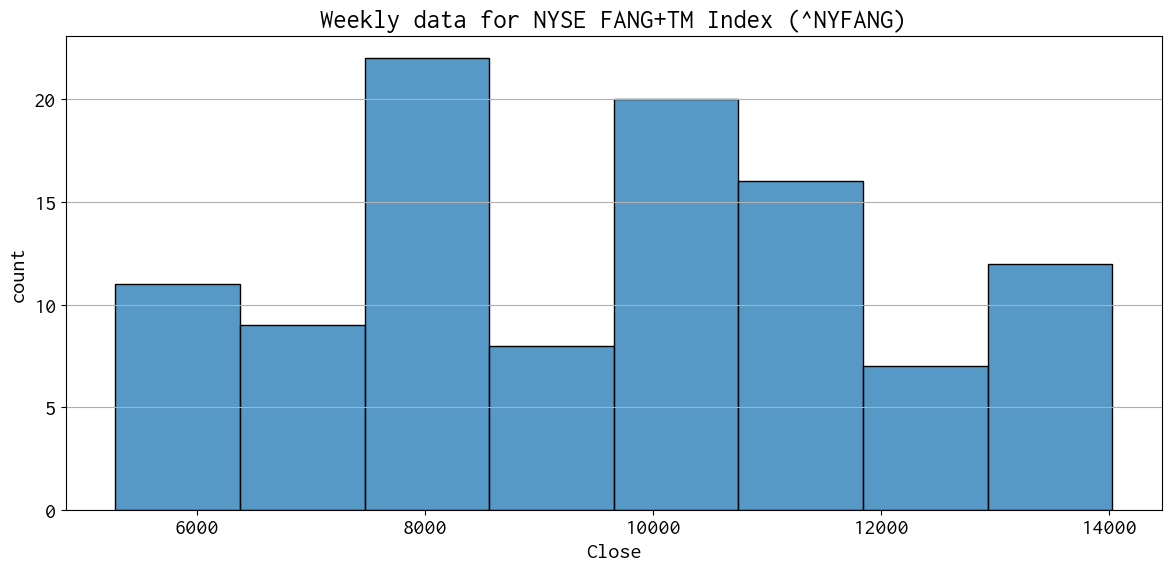

In [12]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

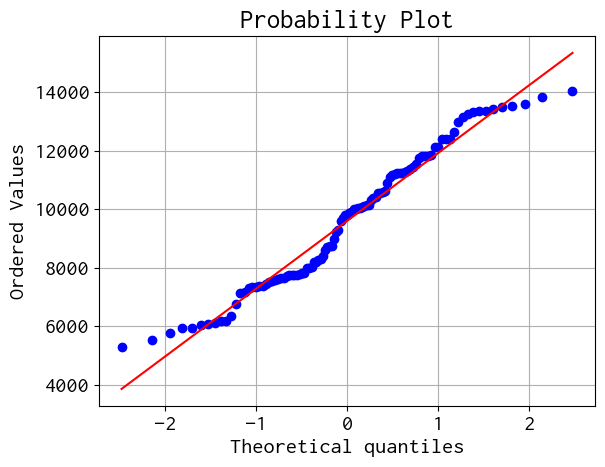

In [13]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [14]:
len(df)

105

In [15]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9624556204068881, p-value: 0.00456471323008903
